# Code with Detailed Comments (Synthetic Data Example)


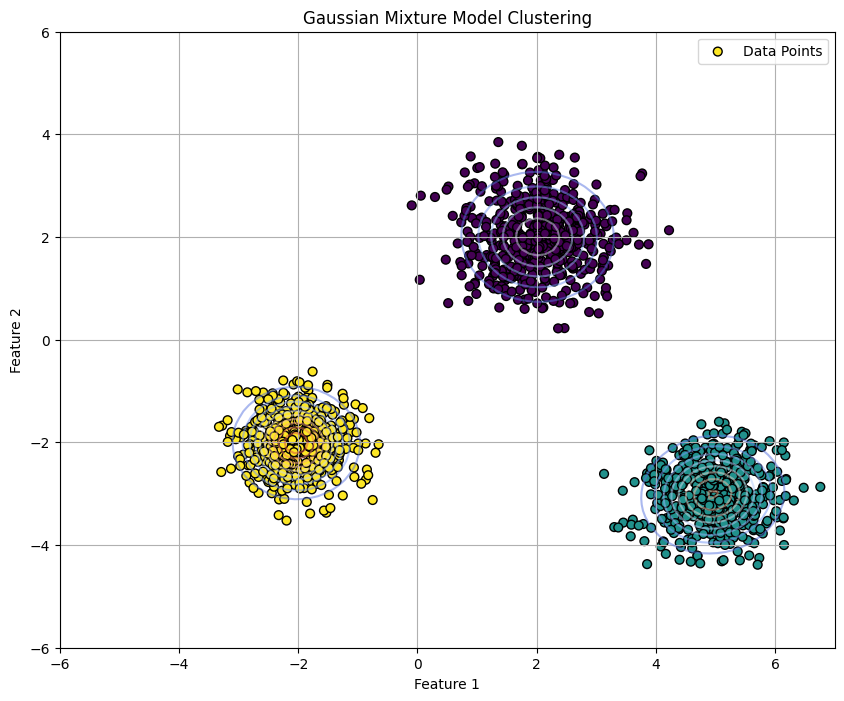

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Step 1: Generate synthetic data
# We set a random seed to ensure reproducibility of results
np.random.seed(0)

# Number of samples in each cluster
n_samples = 500

# Create 3 Gaussian-distributed clusters (each follows a different normal distribution)
# Cluster 1 (centered at (-2, -2), smaller spread)
cluster1 = np.random.normal(loc=(-2, -2), scale=0.5, size=(n_samples, 2))

# Cluster 2 (centered at (2, 2), wider spread)
cluster2 = np.random.normal(loc=(2, 2), scale=0.7, size=(n_samples, 2))

# Cluster 3 (centered at (5, -3), medium spread)
cluster3 = np.random.normal(loc=(5, -3), scale=0.6, size=(n_samples, 2))

# Combine the clusters into one dataset
# We vertically stack the generated points from the three clusters
X = np.vstack((cluster1, cluster2, cluster3))

# Step 2: Fit Gaussian Mixture Model (GMM)
# We create a GaussianMixture model with 3 components (since we know there are 3 clusters)
gmm = GaussianMixture(n_components=3, random_state=0)

# Fit the model to the dataset 'X'. The model learns the mean and covariance of each component.
gmm.fit(X)

# Step 3: Predict cluster labels for each data point
# Based on the fitted GMM, assign a label to each point according to the highest probability of belonging to a cluster
labels = gmm.predict(X)

# Step 4: Visualize the clustering results
plt.figure(figsize=(10, 8))

# Plot the data points and color them according to the cluster labels
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', marker='o', edgecolor='k', label='Data Points')

# Step 5: Plot the GMM contours
# Create a grid of values over which we will plot the probability densities of the GMM components
x = np.linspace(-6, 7, 100)
y = np.linspace(-6, 6, 100)
X_grid, Y_grid = np.meshgrid(x, y)

# Combine the grid points into a single array
XY = np.column_stack([X_grid.ravel(), Y_grid.ravel()])

# Calculate the density (log probability) of each point in the grid under the fitted GMM
Z = np.exp(gmm.score_samples(XY)).reshape(X_grid.shape)

# Plot the contours of the Gaussian densities (representing the regions where data points are most likely to belong to)
plt.contour(X_grid, Y_grid, Z, levels=10, cmap='coolwarm', alpha=0.5)

# Set the title and axis labels
plt.title("Gaussian Mixture Model Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Show the plot with legend and grid
plt.legend()
plt.grid(True)
plt.show()


# Applying GMM to a Real-World Problem: Iris Dataset


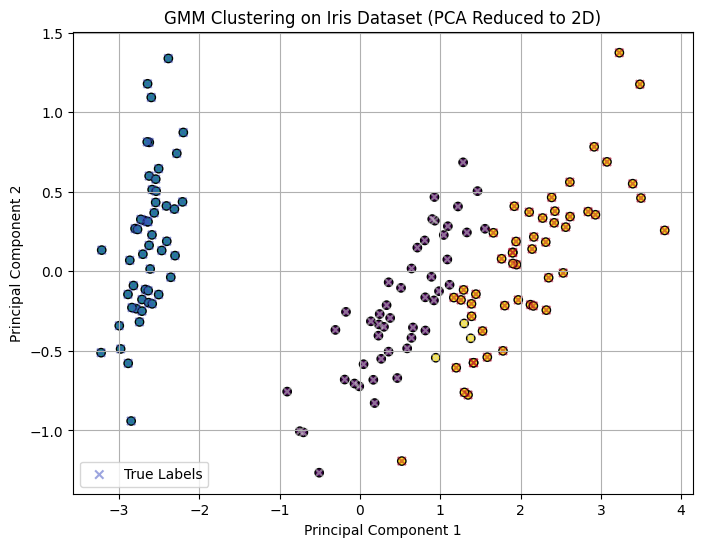

In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

# Step 1: Load the Iris dataset
iris = datasets.load_iris()
X = iris.data  # Features (sepal length, sepal width, petal length, petal width)
y = iris.target  # Actual labels (0, 1, 2 - corresponding to species)

# Step 2: Reduce the dimensionality using PCA (from 4D to 2D for visualization)
# PCA allows us to visualize high-dimensional data by projecting it into 2D space
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Step 3: Fit a Gaussian Mixture Model
# We know there are 3 species of Iris flowers, so we use 3 components in the GMM
gmm = GaussianMixture(n_components=3, random_state=0)
gmm.fit(X_pca)

# Step 4: Predict the cluster labels
labels = gmm.predict(X_pca)

# Step 5: Visualize the results
plt.figure(figsize=(8, 6))

# Plot the PCA-reduced data points, color them by their GMM cluster labels
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k')

# Plot the actual species for comparison (optional)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', marker='x', alpha=0.5, label='True Labels')

# Set the plot title and labels
plt.title("GMM Clustering on Iris Dataset (PCA Reduced to 2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Show legend and grid
plt.legend()
plt.grid(True)
plt.show()
